In [1]:
#Aquasat exploration

In [8]:
library(dplyr,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(tzdb,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(withr,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(readr,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(ggplot2,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(labeling,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(farver,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(vroom,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(lubridate,lib.loc = "/nas/cee-water/cjgleason/r-lib/")
library(caTools,lib.loc = "/nas/cee-water/cjgleason/r-lib/")


Warning message:
“package ‘dplyr’ was built under R version 4.2.0”


ERROR: Error: package or namespace load failed for ‘dplyr’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘vctrs’ 0.4.0 is already loaded, but >= 0.4.1 is required


In [3]:
getwd()

[1] "/nas/cee-water/cjgleason/ellie/SNiP/Aquasat"

In [4]:
Aquasat <- read.csv("sr_wq_rs_join.csv")

In [5]:
head(Aquasat)
print(ncol(Aquasat))
print(nrow(Aquasat))
names(Aquasat)
Aquasat %>% 
    count(type)
    

,system.index,SiteID,blue,blue_sd,date_unity,green,green_sd,nir,nir_sd,path,⋯,long,TZID,date_utc,clouds,time,landsat_id,timediff,pwater,type,id
,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1,8348,230,25.89035,2004-08-23T12:00:00Z,243,22.78187,383.0000,30.70424,10,⋯,-67.82940,America/New_York,2004-08-23T16:00:00Z,17,2004-08-23T15:02:20Z,LE07_L1TP_010028_20040823_20160926_01_T1,0.9610410,97,Lake,New
2,3,8348,200,23.91702,2001-08-22T12:00:00Z,212,23.64533,242.0000,23.73033,10,⋯,-67.82940,America/New_York,2001-08-22T16:00:00Z,6,2001-08-23T14:53:48Z,LT05_L1TP_010028_20010823_20160917_01_T1,-22.8968256,97,Lake,New
3,4,8348,543,31.11958,2003-06-25T12:00:00Z,495,31.44690,639.0000,33.75664,10,⋯,-67.82940,America/New_York,2003-06-25T16:00:00Z,3,2003-06-26T14:49:37Z,LT05_L1TP_010028_20030626_20160915_01_T1,-22.8271217,97,Lake,New
4,6,7889,269,31.26599,1988-07-18T12:00:00Z,270,32.08251,364.4707,56.94264,10,⋯,-67.58515,America/Moncton,1988-07-18T15:00:00Z,26,1988-07-18T14:44:16Z,LT05_L1TP_010028_19880718_20161002_01_T1,0.2621853,95,Lake,New
5,7,7889,146,18.72004,1990-07-08T12:00:00Z,137,33.13925,212.0000,17.41379,10,⋯,-67.58515,America/Moncton,1990-07-08T15:00:00Z,4,1990-07-08T14:33:41Z,LT05_L1TP_010028_19900708_20160930_01_T1,0.4384189,95,Lake,New
6,8,7889,369,24.94186,1992-05-26T12:00:00Z,414,28.24199,651.0000,31.13198,10,⋯,-67.58515,America/Moncton,1992-05-26T15:00:00Z,23,1992-05-26T14:37:08Z,LT05_L1TP_010028_19920526_20160929_01_T1,0.3809778,95,Lake,New


[1] 43
[1] 414835


[1] "system.index" "SiteID"       "blue"         "blue_sd"      "date_unity"  
 [6] "green"        "green_sd"     "nir"          "nir_sd"       "path"        
[11] "pixelCount"   "qa"           "qa_sd"        "red"          "red_sd"      
[16] "row"          "sat"          "swir1"        "swir1_sd"     "swir2"       
[21] "swir2_sd"     ".geo"         "endtime"      "date"         "date_only"   
[26] "chl_a"        "doc"          "p_sand"       "secchi"       "tis"         
[31] "tss"          "source"       "lat"          "long"         "TZID"        
[36] "date_utc"     "clouds"       "time"         "landsat_id"   "timediff"    
[41] "pwater"       "type"         "id"

ERROR: Error in Aquasat %>% count(type): could not find function "%>%"


In [6]:
AquasatStream <- Aquasat %>%
    filter(type == 'Stream')
nrow(AquasatStream)

ERROR: Error in Aquasat %>% filter(type == "Stream"): could not find function "%>%"


In [6]:
#Save only stream data to RDS for use with SNiP data
WQPdata <- write.csv(AquasatStream, file = "/nas/cee-water/cjgleason/ellie/SNiP/WQPdata/AquasatStream.csv")


In [7]:
#Visualize for choosing test river
Aquaviz <- AquasatStream %>%
    select(SiteID, tss, date, lat, long, path, row, landsat_id) %>%
    filter(!is.na(tss)) %>%
    group_by(SiteID) %>% 
    summarise(record_count = n()) %>%
    filter(record_count > 100) 
      
Aquaviz


SiteID,record_count
<chr>,<int>
21VASWCB-2-JMS157.28,120
ARDEQH2O_WQX-WHI0025,103
CBP_WQX-CB1.1,116
CBP_WQX-CB2.1,124
CBP_WQX-CB2.2,118
CBP_WQX-CB3.1,116
CBP_WQX-CB3.2,128
CBP_WQX-CB3.3C,127
CBP_WQX-CB3.3E,104


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


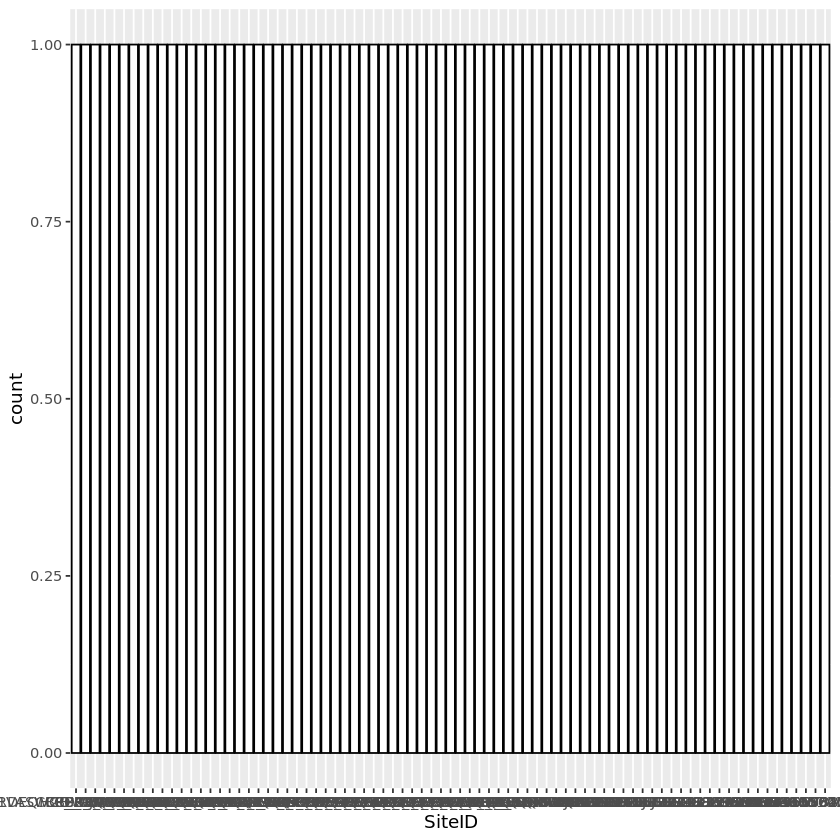

In [8]:
ggplot(Aquaviz, aes(x=SiteID)) + geom_histogram(stat= 'count', color="black", fill="white", bins=50)

In [19]:
#Build a validation/test dataset from TSS Aquasat data

#Get CONUS sites with a lot of data
siteFilter <- AquasatStream %>%
    filter(!is.na(tss)) %>%
    group_by(SiteID) %>% tally(sort = TRUE) %>% filter(n > 50)

#Filter AquasatStream for these sites
aquaValTest <- AquasatStream %>%
    inner_join(siteFilter, by='SiteID')

head(aquaValTest)


,system.index,SiteID,blue,blue_sd,date_unity,green,green_sd,nir,nir_sd,path,⋯,TZID,date_utc,clouds,time,landsat_id,timediff,pwater,type,id,n
,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,164,USGS-01335770,690.0000,29.29617,1986-10-22T23:00:00Z,674,36.18237,574,55.44009,13,⋯,UTC,1986-10-22T23:00:00Z,4,1986-10-22T14:52:14Z,LT05_L1TP_013030_19861022_20161003_01_T1,8.1293600,94,Stream,New,487
2,167,USGS-01335770,591.0000,27.77339,1992-09-04T21:20:00Z,616,28.52959,746,55.57673,13,⋯,UTC,1992-09-04T21:20:00Z,61,1992-09-04T14:55:09Z,LT05_L1TP_013030_19920904_20160929_01_T1,6.4141133,94,Stream,New,487
3,168,USGS-01335770,880.0000,23.31283,1993-03-31T19:30:00Z,1120,26.90561,911,35.27801,13,⋯,UTC,1993-03-31T19:30:00Z,8,1993-03-31T14:55:07Z,LT05_L1TP_013030_19930331_20160928_01_T1,4.5813103,94,Stream,New,487
4,169,USGS-01335770,406.0000,36.06233,1994-10-28T16:05:00Z,330,36.20892,277,53.44883,13,⋯,UTC,1994-10-28T16:05:00Z,1,1994-10-28T14:48:06Z,LT05_L1TP_013030_19941028_20160927_01_T1,1.2814994,94,Stream,New,487
5,172,USGS-01335770,264.5015,86.01317,1994-12-15T15:30:00Z,252,80.91235,132,132.85412,13,⋯,UTC,1994-12-15T15:30:00Z,34,1994-12-15T14:46:31Z,LT05_L1TP_013030_19941215_20160926_01_T1,0.7244703,94,Stream,New,487
6,176,USGS-01335770,379.0000,29.80849,1995-04-06T21:45:00Z,377,32.72121,251,46.85935,13,⋯,UTC,1995-04-06T21:45:00Z,6,1995-04-06T14:42:12Z,LT05_L1TP_013030_19950406_20160926_01_T1,7.0465361,94,Stream,New,487


In [32]:
#Randomly split and save for training/testing
dataSplitCONUS <- sample.split(aquaValTest,SplitRatio = 0.3)

#subsetting into Train data and saving as RDS
aquaTrainCONUS =subset(aquaValTest,dataSplitCONUS == TRUE)
#aquaTrainCONUS <- saveRDS(aquaTrainCONUS, file = "/nas/cee-water/cjgleason/ellie/SNiP/Aquasat/aquaTrainCONUS.rds")


#subsetting into Test data and saving as RDS
aquaTestCONUS =subset(aquaValTest,dataSplitCONUS ==FALSE)
#aquaTestCONUS <- saveRDS(aquaTrainCONUS, file = "/nas/cee-water/cjgleason/ellie/SNiP/Aquasat/aquaTestCONUS.rds")
